In [21]:
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

titanic_df=pd.read_excel("titanic_data.xlsx")
titanic_df
with_m=titanic_df

In [22]:
#Q1
titanic_df=titanic_df.dropna(subset=["Age"])
n_missing=len(with_m)-len(titanic_df)
print("The number of missing values are", n_missing)
perc_m= (n_missing/len(titanic_df))
print("The percentage of missing values is {:.2%}".format(perc_m))


The number of missing values are 177
The percentage of missing values is 24.79%


In [23]:
#Q2
titanic_df.loc[:, "NotAlone"]=0

for index,row in titanic_df.iterrows():
    if row["SibSp"]==0 and row["Parch"]==0:
        titanic_df.loc[index, "NotAlone"]=0
    else:
        titanic_df.loc[index, "NotAlone"]=1
titanic_df        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NotAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [24]:
#Q3:
titanic_df1=titanic_df.groupby("Pclass")

titanic_df_passenger_class_1 = titanic_df1.get_group(1)
titanic_df_passenger_class_2 = titanic_df1.get_group(2)
titanic_df_passenger_class_3 = titanic_df1.get_group(3)

print("There are",len(titanic_df_passenger_class_1), "people in the first class")
print("There are", len(titanic_df_passenger_class_2), "people in the second class")
print("There are", len(titanic_df_passenger_class_3), "people in the third class")
print("The biggest passenger class is the third class")



There are 186 people in the first class
There are 173 people in the second class
There are 355 people in the third class
The biggest passenger class is the third class


In [25]:
# titanic_df_passenger_class_1
# Age
print("The mean age for class 1 is",titanic_df_passenger_class_1['Age'].mean())
print("The median age for class 1 is",titanic_df_passenger_class_1['Age'].median())
#Fare
print("\n")
print("The mean fare for class 1 is",titanic_df_passenger_class_1['Fare'].mean())
print("The median fare for class 1 is",titanic_df_passenger_class_1['Fare'].median())
print("\n\n")
# titanic_df_passenger_class_2
# Age
print("The mean age for class 2 is",titanic_df_passenger_class_2['Age'].mean())
print("The median age for class 2 is",titanic_df_passenger_class_2['Age'].median())
print("\n")
#Fare
print("The mean fare for class 2 is",titanic_df_passenger_class_2['Fare'].mean())
print("The median fare for class 2 is",titanic_df_passenger_class_2['Fare'].median())
print("\n\n")
# titanic_df_passenger_class_3
# Age
print("The mean age for class 3 is",titanic_df_passenger_class_3['Age'].mean())
print("The median age for class 3 is",titanic_df_passenger_class_3['Age'].median())
print("\n")
#Fare
print("The mean fare for class 3 is",titanic_df_passenger_class_3['Fare'].mean())
print("The median fare for class 3 is",titanic_df_passenger_class_3['Fare'].median())
print("\n\n")
print("Class 1 has the highest mean age and Class 3 has the lowest mean age")
print("Class 1 has the highest mean fare and Class 3 has the lowest mean fare")
print("Class 1 has the highest median age and Class 3 has the lowest median age")
print("Class1 has the highest median fare and Class 3 has the lowest median fare")


The mean age for class 1 is 38.233440860215055
The median age for class 1 is 37.0


The mean fare for class 1 is 87.96158225806447
The median fare for class 1 is 69.3



The mean age for class 2 is 29.87763005780347
The median age for class 2 is 29.0


The mean fare for class 2 is 21.47155606936416
The median fare for class 2 is 15.0458



The mean age for class 3 is 25.14061971830986
The median age for class 3 is 24.0


The mean fare for class 3 is 13.229435211267623
The median fare for class 3 is 8.05



Class 1 has the highest mean age and Class 3 has the lowest mean age
Class 1 has the highest mean fare and Class 3 has the lowest mean fare
Class 1 has the highest median age and Class 3 has the lowest median age
Class1 has the highest median fare and Class 3 has the lowest median fare


In [26]:
#Q4:
titanic_df_survived=[]
titanic_df_not_survived=[]
for index,row in titanic_df.iterrows():
    if row["Survived"]==1:
        titanic_df_survived.append(row)
    else:
        titanic_df_not_survived.append(row)
titanic_df_survived=pd.DataFrame(titanic_df_survived)
titanic_df_not_survived= pd.DataFrame(titanic_df_not_survived)
len(titanic_df_survived)
len(titanic_df_not_survived)

print("There are",len(titanic_df_survived), "survived" )
print("There are",len(titanic_df_not_survived), "unsurvived" )

There are 290 survived
There are 424 unsurvived


In [27]:
#Calculate how many people survived and how many people died in each passenger class
print('Number of people survived in class 1: '+str(titanic_df_passenger_class_1['Survived'].value_counts()[1])) #Separate the Suvived column into 0(did not suvived) and 1(survived), and count their frequency
print('Number of people did not survived in class 1: '+str(titanic_df_passenger_class_1['Survived'].value_counts()[0]))
print('Number of people survived in class 2: '+str(titanic_df_passenger_class_2['Survived'].value_counts()[1]))
print('Number of people did not survived in class 2: '+str(titanic_df_passenger_class_2['Survived'].value_counts()[0]))
print('Number of people survived in class 3: '+str(titanic_df_passenger_class_3['Survived'].value_counts()[1]))
print('Number of people did notsurvived in class 3: '+str(titanic_df_passenger_class_3['Survived'].value_counts()[0]))

Number of people survived in class 1: 122
Number of people did not survived in class 1: 64
Number of people survived in class 2: 83
Number of people did not survived in class 2: 90
Number of people survived in class 3: 85
Number of people did notsurvived in class 3: 270


In [29]:
#Question 5:
def variance(data):
    # Mean of the data
    mean = sum(data) / len(data)
    print(sum(data))
    # Square deviations
    deviations = []
    for x in data:
        deviations.append((x-mean)**2)
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / len(data)
    return variance

def stdev(data):
    var = variance(data)
    std_dev = math.sqrt(var)
    return std_dev
    
def corr(data1, data2):
    mean1 = sum(data1) / len(data1)
    mean2 = sum(data2) / len(data2)
    dev1 = [(x - mean1) for x in data1]
    dev2 = [(x - mean2) for x in data2]
    dev3 = []
    for x,y in zip(dev1,dev2):
        dev3.append(x*y)
    corr = (sum(dev3))/(stdev(data1)*stdev(data2))
    return corr/len(data1)

'    # Square deviations\n    deviations = []\n    for x in data:\n        deviations.append((x-mean)**2)\n    deviations = [(x - mean) ** 2 for x in data]\n    # Variance\n    variance = sum(deviations) / len(data)\n    return variance\n\ndef stdev(data):\n    var = variance(data)\n    std_dev = math.sqrt(var)\n    return std_dev\n    \ndef corr(data1, data2):\n    mean1 = sum(data1) / len(data1)\n    mean2 = sum(data2) / len(data2)\n    dev1 = [(x - mean1) for x in data1]\n    dev2 = [(x - mean2) for x in data2]\n    dev3 = []\n    for x,y in zip(dev1,dev2):\n        dev3.append(x*y)\n    corr = (sum(dev3))/(stdev(data1)*stdev(data2))\n    return corr/len(data1)'

In [20]:
#Question 6:
#
corr_matrix = pd.DataFrame(index = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'NotAlone'],columns= ['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'NotAlone'])

col = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'NotAlone']

for x in col:
    for y in col:
        corr_matrix.at[x,y] = corr(titanic_df[x],titanic_df[y])
corr_matrix

290
290
290
21205.17
290
366
290
308
290
24771.882999999958
290
310
21205.17
290
21205.17
21205.17
21205.17
366
21205.17
308
21205.17
24771.882999999958
21205.17
310
366
290
366
21205.17
366
366
366
308
366
24771.882999999958
366
310
308
290
308
21205.17
308
366
308
308
308
24771.882999999958
308
310
24771.882999999958
290
24771.882999999958
21205.17
24771.882999999958
366
24771.882999999958
308
24771.882999999958
24771.882999999958
24771.882999999958
310
310
290
310
21205.17
310
366
310
308
310
24771.882999999958
310
310


,Survived,Age,SibSp,Parch,Fare,NotAlone
Survived,1,-0.0772211,-0.0173584,0.093317,0.268189,0.19614
Age,-0.0772211,1,-0.308247,-0.189119,0.0960667,-0.19827
SibSp,-0.0173584,-0.308247,1,0.38382,0.138329,0.629818
Parch,0.093317,-0.189119,0.38382,1,0.205119,0.577524
Fare,0.268189,0.0960667,0.138329,0.205119,1,0.260136
NotAlone,0.19614,-0.19827,0.629818,0.577524,0.260136,1


In [10]:
#Question 7:
#Calculate the standard deviation for Age and Fare
stdev(titanic_df['Age'])
stdev(titanic_df['Fare'])

#The standard deviation for Age is 14.516321150817317
#The standard deviation for Fare is 52.881858444051744

52.881858444051744

In [11]:
#Q8:
female_1=titanic_df.loc[(titanic_df["Sex"]=="female")& (titanic_df["Pclass"]==1), :]
Psurv_fem1= len(female_1.loc[titanic_df["Survived"]==1, :])/len(female_1)
print("The female survival rate in the first class is {:.2%}".format(Psurv_fem1))

female_2=titanic_df.loc[(titanic_df["Sex"]=="female")& (titanic_df["Pclass"]==2), :]
Psurv_fem2= len(female_2.loc[titanic_df["Survived"]==1, :])/len(female_2)
print("The female survival rate in the second class is {:.2%}".format(Psurv_fem2))

female_3=titanic_df.loc[(titanic_df["Sex"]=="female")& (titanic_df["Pclass"]==3), :]
Psurv_fem3= len(female_3.loc[titanic_df["Survived"]==1, :])/len(female_3)
print("The female survival rate in the third class is {:.2%}".format(Psurv_fem3))

The female survival rate in the first class is 96.47%
The female survival rate in the second class is 91.89%
The female survival rate in the third class is 46.08%


In [12]:
male_1=titanic_df.loc[(titanic_df["Sex"]=="male")& (titanic_df["Pclass"]==1), :]
Psurv_m1= len(male_1.loc[titanic_df["Survived"]==1, :])/len(male_1)
print("The male survival rate in the first class is {:.2%}".format(Psurv_m1))

male_2=titanic_df.loc[(titanic_df["Sex"]=="male")& (titanic_df["Pclass"]==2), :]
Psurv_m2= len(male_2.loc[titanic_df["Survived"]==1, :])/len(male_2)
print("The male survival rate in the second class is {:.2%}".format(Psurv_m2))

male_3=titanic_df.loc[(titanic_df["Sex"]=="male")& (titanic_df["Pclass"]==3), :]
Psurv_m3= len(male_3.loc[titanic_df["Survived"]==1, :])/len(male_3)
print("The male survival rate in the third class is {:.2%}".format(Psurv_m3))
print("\n")
print("Female in the first class have highest survival rate, while male in the third class have lowest survival rate")


The male survival rate in the first class is 39.60%
The male survival rate in the second class is 15.15%
The male survival rate in the third class is 15.02%


Female in the first class have highest survival rate, while male in the third class have lowest survival rate


In [13]:
child=titanic_df.loc[(titanic_df["Age"]<=10) & (titanic_df["Pclass"]==3), :]
Pchild=len(child)/len(titanic_df)
print("The survival rate for child at age 10 or less in the third class is {:.2%}".format(Pchild))

The survival rate for child at age 10 or less in the third class is 6.16%


In [14]:
Eclass1=titanic_df.loc[titanic_df["Pclass"]==1, "Fare"].sum().round(2)
Eclass2=titanic_df.loc[titanic_df["Pclass"]==2, "Fare"].sum().round(2)
Eclass3=titanic_df.loc[titanic_df["Pclass"]==3, "Fare"].sum().round(2)
print("The expectation of fare for class 1 is", Eclass1)
print("The expectation of fare for class 2 is", Eclass2)
print("The expectation of fare for class 3 is", Eclass3)

The expectation of fare for class 1 is 16360.85
The expectation of fare for class 2 is 3714.58
The expectation of fare for class 3 is 4696.45


In [1]:
#9
all_title=[]
random=0
title_list=[]
for index,row in titanic_df.iterrows():
    m=row["Name"].split(", ")
    all_title.append(m[1])

all_title1=[]
for rd in all_title:
    rd=rd.split(".")
    all_title1.append(rd[0])
    
for i in all_title1:
    random=i
    if random in title_list:
        pass
    else:
        title_list.append(random)
        
titanic_df['Title'] = np.array(all_title1)
print(title_list)



NameError: name 'titanic_df' is not defined

In [16]:
mr=len(titanic_df.loc[(titanic_df["Title"]=="Mr"), :])/len(titanic_df)
mrs=len(titanic_df.loc[(titanic_df["Title"]=="Mrs"), :])/len(titanic_df)
miss=len(titanic_df.loc[(titanic_df["Title"]=="Miss"), :])/len(titanic_df)
master=len(titanic_df.loc[(titanic_df["Title"]=="Master"), :])/len(titanic_df)
don=len(titanic_df.loc[(titanic_df["Title"]=="Don"), :])/len(titanic_df)
rev=len(titanic_df.loc[(titanic_df["Title"]=="Rev"), :])/len(titanic_df)
dr=len(titanic_df.loc[(titanic_df["Title"]=="Dr"), :])/len(titanic_df)
mme=len(titanic_df.loc[(titanic_df["Title"]=="Mme"), :])/len(titanic_df)

ms=len(titanic_df.loc[(titanic_df["Title"]=="Ms"), :])/len(titanic_df)
major=len(titanic_df.loc[(titanic_df["Title"]=="Major"), :])/len(titanic_df)
lady=len(titanic_df.loc[(titanic_df["Title"]=="Lady"), :])/len(titanic_df)
sir=len(titanic_df.loc[(titanic_df["Title"]=="Sir"), :])/len(titanic_df)
col=len(titanic_df.loc[(titanic_df["Title"]=="Col"), :])/len(titanic_df)
capt=len(titanic_df.loc[(titanic_df["Title"]=="Capt"), :])/len(titanic_df)
tcou=len(titanic_df.loc[(titanic_df["Title"]=="the Countess"), :])/len(titanic_df)
joh=len(titanic_df.loc[(titanic_df["Title"]=="Jonkheer"), :])/len(titanic_df)


In [87]:
print("The survival rate for Mr is {:.2%}".format(mr))
print("The survival rate for Mrs is {:.2%}".format(mrs))
print("The survival rate for Miss is {:.2%}".format(miss))

The survival rate for Mr is 55.74%
The survival rate for Mrs is 15.13%
The survival rate for Miss is 20.45%


Text(0.5, 1.0, 'Number of People Survived and Unsurvived')

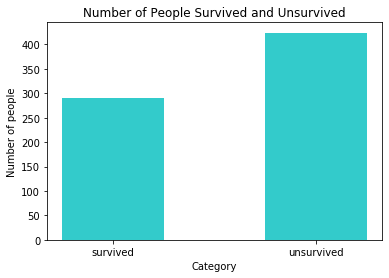

In [83]:
#Q10
x_axis=("survived","unsurvived")
number=[len(titanic_df_survived),len(titanic_df_not_survived)]
plt.bar(x_axis, number, align='center', width=0.5, alpha=0.8, color="c")
plt.xlabel('Category')
plt.ylabel('Number of people')
plt.title('Number of People Survived and Unsurvived')


[Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')]

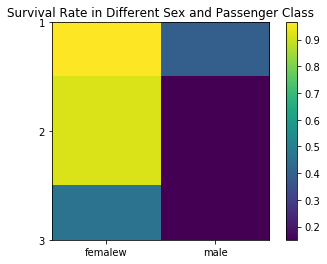

In [82]:
sex=["femalew","male"]
passenger_class=[1,2,3]

survival_rate= np.array([[Psurv_fem1, Psurv_m1],[Psurv_fem2,
                    Psurv_m2], [Psurv_fem3, Psurv_m3]])


fig, ax = plt.subplots()
heatmap = ax.imshow(survival_rate,cmap='viridis')

plt.colorbar(heatmap)
plt.title('Survival Rate in Different Sex and Passenger Class')

ax.set_xticks(np.arange(len(sex)))
ax.set_yticks(np.arange(3))

ax.set_xticklabels(sex)
ax.set_yticklabels(passenger_class)

